In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six.moves.cPickle as pickle
import gzip
import numpy as np

In [ ]:
def encode_label(j):
  """Унитарное кодирование индексов векторов длиной 10"""
  e = np.zeros((10,1))
  e[j] = 1.0
  return e

In [ ]:
!wget https://github.com/maxpumperla/deep_learning_and_the_game_of_go/raw/master/code/dlgo/nn/mnist.npz

--2023-03-09 14:40:42--  https://github.com/maxpumperla/deep_learning_and_the_game_of_go/raw/master/code/dlgo/nn/mnist.npz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/maxpumperla/deep_learning_and_the_game_of_go/master/code/dlgo/nn/mnist.npz [following]
--2023-03-09 14:40:42--  https://raw.githubusercontent.com/maxpumperla/deep_learning_and_the_game_of_go/master/code/dlgo/nn/mnist.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11490434 (11M) [application/octet-stream]
Saving to: ‘mnist.npz.1’

mnist.npz.1         100%[===================>]  10.96M  --.-KB/s    in 0.1s    

2023-03-09 14

In [ ]:
def shape_data(data):
  features = [np.reshape(x, (784,1)) for x in data[0]]
  labels = [encode_label(y) for y in data[1]]
  #return zip(features, labels)
  return list(zip(features, labels))

def load_data_impl():
  # file retrieved by:
  #   wget https://s3.amazonaws.com/img-datasets/mnist.npz -O code/dlgo/nn/mnist.npz
  # code based on:
  #   site-packages/keras/datasets/mnist.py
  path = 'mnist.npz'
  f = np.load(path)
  x_train, y_train = f['x_train'], f['y_train']
  x_test, y_test = f['x_test'], f['y_test']
  f.close()
  return (x_train, y_train), (x_test, y_test)

def load_data():
  train_data, test_data = load_data_impl()
  return shape_data(train_data), shape_data(test_data)

In [ ]:
def sigmoid_double(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid(z):
    return np.vectorize(sigmoid_double)(z)

In [ ]:
def average_digit(data, digit):
  filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
  filtered_array = np.asarray(filtered_data)
  return np.average(filtered_array, axis=0)

train, test = load_data()
avg_eight = average_digit(train, 8)

In [ ]:
from matplotlib import pyplot as plt

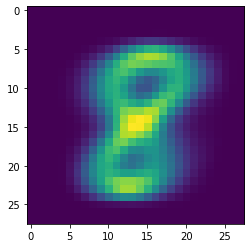

In [ ]:
img = (np.reshape(avg_eight, (28,28)))
plt.imshow(img)
plt.show()

In [ ]:
x_3 = train[2][0] #4
x_18 = train[17][0] #8

#print(x_3)

In [ ]:
W = np.transpose(avg_eight)
W

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
print(np.dot(W, x_3))
print(np.dot(W, x_18))

[[1306671.45787045]]
[[3545954.03537857]]


In [ ]:
def predict(x, W, b):
    return sigmoid_double(np.dot(W, x) + b)

b=-45

print(predict(x_3, W, b))
print(predict(x_18, W, b))

[[1.]]
[[1.]]


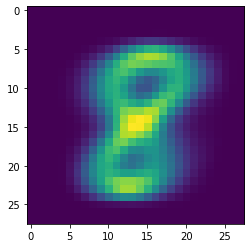

[[1.]]
[[1.]]
0.09751666666666667
0.0974
1.0


In [ ]:
def encode_label(j):  # <1>
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# <1> We one-hot encode indices to vectors of length 10.
# end::encoding[]


# tag::shape_load[]
def shape_data(data):
    features = [np.reshape(x, (784, 1)) for x in data[0]]  # <1>

    labels = [encode_label(y) for y in data[1]]  # <2>

    return list(zip(features, labels))  # <3>


def load_data_impl():
    # file retrieved by:
    #   wget https://s3.amazonaws.com/img-datasets/mnist.npz -O code/dlgo/nn/mnist.npz
    # code based on:
    #   site-packages/keras/datasets/mnist.py
    path = 'mnist.npz'
    f = np.load(path)
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']
    f.close()
    return (x_train, y_train), (x_test, y_test)

def load_data():
    train_data, test_data = load_data_impl()
    return shape_data(train_data), shape_data(test_data)

# tag::average_digit[]
def average_digit(data, digit):  # <1>
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)


train, test = load_data()
avg_eight = average_digit(train, 8)  # <2>

# <1> We compute the average over all samples in our data representing a given digit.
# <2> We use the average eight as parameters for a simple model to detect eights.
# end::average_digit[]

img = (np.reshape(avg_eight, (28, 28)))
plt.imshow(img)
plt.show()
# end::display_digit[]

# tag::eval_eight[]
x_3 = train[2][0]    # <1>
x_18 = train[17][0]  # <2>

W = np.transpose(avg_eight)
np.dot(W, x_3)   # <3>
np.dot(W, x_18)  # <4>

# <1> Training sample at index 2 is a "4".
# <2> Training sample at index 17 is an "8"
# <3> This evaluates to about 20.1.
# <4> This term is much bigger, about 54.2.
# end::eval_eight[]


# tag::predict_simple[]
def predict(x, W, b):  # <1>
    return sigmoid_double(np.dot(W, x) + b)


b = -45  # <2>

print(predict(x_3, W, b))   # <3>
print(predict(x_18, W, b))  # <4> 0.96

def evaluate(data, digit, threshold, W, b):  # <1>
    total_samples = 1.0 * len(data)
    correct_predictions = 0
    for x in data:
        if predict(x[0], W, b) > threshold and np.argmax(x[1]) == digit:  # <2>
            correct_predictions += 1
        if predict(x[0], W, b) <= threshold and np.argmax(x[1]) != digit:  # <3>
            correct_predictions += 1
    return correct_predictions / total_samples

# <1> As evaluation metric we choose accuracy, the ratio of correct predictions among all.
# <2> Predicting an instance of an eight as "8" is a correct prediction.
# <3> If the prediction is below our threshold and the sample is not an "8", we also predicted correctly.
# end::evaluate_simple[]


# tag::evaluate_example[]
a1 = evaluate(data=train, digit=8, threshold=0.5, W=W, b=b)  # <1>

a2 = evaluate(data=test, digit=8, threshold=0.5, W=W, b=b)   # <2>

eight_test = [x for x in test if np.argmax(x[1]) == 8]
a3 = evaluate(data=eight_test, digit=8, threshold=0.5, W=W, b=b)  # <3>

print(a1)
print(a2)
print(a3)

#Keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
model = Sequential()
model.add(Dense(392, activation='sigmoid', input_shape=(784,)))
model.add(Dense(196, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 10)                1970      
                                                                 
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20)
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.1256 - accuracy: 0.0955
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0915 - accuracy: 0.1372
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0902 - accuracy: 0.1253
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0900 - accuracy: 0.1229
Epoch 5/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0899 - accuracy: 0.1192
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0898 - accuracy: 0.1173
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0898 - accuracy: 0.1164
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0898 - accuracy: 0.1179
Epoch 9/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0898 - accuracy: 0.1177
Epoch 10/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0897 - accuracy: 